In [76]:
import os
import eikon as ek
import numpy as np
import pandas as pd
from matplotlib import pyplot
import time
import warnings
warnings.filterwarnings("ignore")
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import statistics as stats 
import math
import datetime
ek.set_app_key('APP_KEY')

df = pd.read_csv('close_nifty100.csv',index_col='Date')
df_open= pd.read_csv('open_nifty100.csv',index_col='Date')
df_high= pd.read_csv('high_nifty100.csv',index_col='Date')
df_low= pd.read_csv('low_nifty100.csv',index_col='Date')

pd.to_datetime(df.index)
pd.to_datetime(df_open.index)
pd.to_datetime(df_high.index)
pd.to_datetime(df_low.index)


DatetimeIndex(['2016-10-28', '2016-10-30', '2016-01-11', '2016-02-11',
               '2016-03-11', '2016-04-11', '2016-07-11', '2016-08-11',
               '2016-09-11', '2016-10-11',
               ...
               '2020-01-06', '2020-02-06', '2020-03-06', '2020-04-06',
               '2020-05-06', '2020-08-06', '2020-09-06', '2020-10-06',
                      'NaT',        'NaT'],
              dtype='datetime64[ns]', name='Date', length=895, freq=None)

In [130]:
nextfiltered_close[top_buy].at[daysymbols[0],nextfiltered_close.index[0]] = 1
nextfiltered_close[top_buy]

,AXBK.NS,IOC.NS,ITC.NS,TISC.NS,ADAI.NS
Date,,,,,
22/12/16,447.55,153.15,227.55,351.894192,54.65


In [106]:
daysymbols = ['AXBK.NS','BJFN.NS','MOSS.NS','ADAI.NS','RELI.NS']

# for syms in daysymbols:
#     alldata = ek.get_timeseries(rics=syms,fields=['CLOSE'],start_date='2019-11-07 04:45:00',end_date='2019-11-07 9:30:00',interval='minute',corax='adjusted')
#     bprc = (alldata[:15].sample().values[0][0])
#     sprc = (alldata[-15:].sample().values[0][0])
#     stopprc = alldata[alldata['CLOSE'] < 0.99*bprc][:1]
#     if(len(stopprc) > 0):
#         rsprc = stopprc.values[0][0]
#     else:
#         rsprc = sprc
    
#     print(syms,bprc,sprc,rsprc)
#     time.sleep(2)
#     pyplot.plot(alldata.values)
#     pyplot.show()

    

for syms in daysymbols:
    alldata = ek.get_timeseries(rics=syms,fields=['CLOSE'],start_date='2019-08-04 04:45:00',end_date='2019-08-04 9:30:00',interval='minute',corax='adjusted')
    sprc = (alldata[:15].sample().values[0][0])
    bprc = (alldata[-15:].sample().values[0][0])
    stopprc = alldata[alldata['CLOSE'] > 1.01*sprc][:1]
    if(len(stopprc) > 0):
        rbprc = stopprc.values[0][0]
    else:
        rbprc = bprc
    
    print(syms,sprc,bprc,rbprc)
    time.sleep(2)
    pyplot.plot(alldata.values)
    pyplot.show()

2020-06-25 16:04:17,665 P[87244] [MainThread 4517006784] Error with AXBK.NS: No data available for the requested date range
2020-06-25 16:04:17,666 P[87244] [MainThread 4517006784] AXBK.NS: No data available for the requested date range | 


EikonError: Error code -1 | AXBK.NS: No data available for the requested date range | 

###########################
          BION.NS  ARBN.NS  HCLT.NS  PGRD.NS  DIVI.NS
Date                                                 
24/09/18  332.725   731.35   548.15    197.6  1361.75
            BRTI.NS  LTFH.NS  TCS.NS  BJFN.NS  ADAI.NS
Date                                                  
24/09/18  327.05536   130.15  2115.0   2260.8    178.9
          BION.NS  ARBN.NS  HCLT.NS  PGRD.NS  DIVI.NS
Date                                                 
24/09/18    343.5    766.0   542.95    200.0   1387.9
          BRTI.NS  LTFH.NS  TCS.NS  BJFN.NS  ADAI.NS
Date                                                
24/09/18    370.4    144.0  2115.0  2422.15    183.0


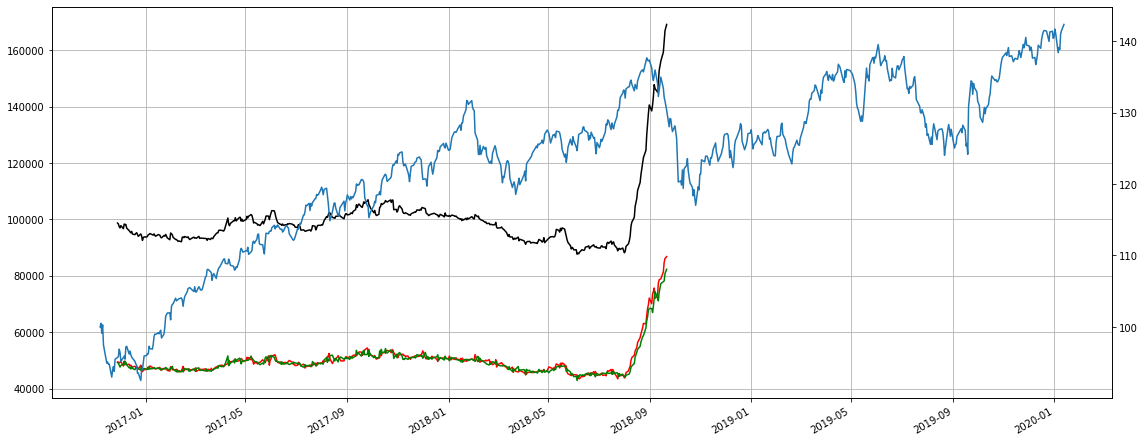

Avg Return Long: 0.1%
Avg Return Short: 0.11%
Avg Return Overall: 0.21%
CAGR: nan
25
4476


In [78]:
import statistics as stats 
import math
nDays = 14
Total_cap = 100000
Capital_buy = 0
Capital_sell = 0

PnL_Long  = pd.Series(index=df[nDays:].index)
PnL_Short = pd.Series(index=df[nDays:].index)
Capital = pd.Series(index=df[nDays:].index)


indexx = ek.get_timeseries(rics=['.NIFTY100'],fields=['CLOSE'],start_date='2016-11-07',end_date='2020-06-10',interval='daily',corax='adjusted')
indexx.CLOSE = 100*indexx.CLOSE/indexx.CLOSE[0]


returns_buy_list = {}
returns_sell_list = {}

stoploss_hit_count = 0
stoploss_not_hit_count = 0
for i in range(0,len(df) - nDays):
    #positive skewness and low kurtosis
    filtered = df[i:nDays + i]
    filtered_high = df_high[i+6:nDays + i+6]
    filtered_low = df_low[i+6:nDays + i+6]
    filtered_open = df_open[i:nDays + i]

    nextfiltered_close = df[nDays + i :nDays + i + 1]
    nextfiltered_open  = df_open[nDays + i :nDays + i + 1 ]
    nextfiltered_high  = df_high[nDays + i + 6:nDays + i + 1+ 6]
    nextfiltered_low  = df_low[nDays + i+ 6:nDays + i + 1+ 6]
    filtered_index = indexx[i:nDays + i]
    
    ##################Buying Logic###################
    last = filtered.shift(1)
    last.fillna(method='bfill',inplace=True)
    returns = (filtered - last)/last

    gap = (filtered_open - filtered)/filtered_open
    

#     if(filtered_index['CLOSE'].std() > 1):
#         sorted_sell = ((returns[-nDays+1:].mean() - ((round(returns[-nDays+1:]*1000)).median()/1000))/(returns[-nDays+1:].std()**2)).sort_values(ascending=False)[:5]
#         sorted_buy = ((-returns[-nDays+1:].mean() + ((round(returns[-nDays+1:]*1000)).median()/1000))/(returns[-nDays+1:].std()**2)).sort_values(ascending=False)[:5]
#     else:
#         sorted_buy = ((returns[-nDays+1:].mean() - ((round(returns[-nDays+1:]*1000)).median()/1000))/(returns[-nDays+1:].std()**2)).sort_values(ascending=False)[:5]
#         sorted_sell = ((-returns[-nDays+1:].mean() + ((round(returns[-nDays+1:]*1000)).median()/1000))/(returns[-nDays+1:].std()**2)).sort_values(ascending=False)[:5]
    sorted_buy = (-gap.mean()).sort_values(ascending=False)[:5]
    sorted_sell = (gap.mean()).sort_values(ascending=False)[:5]

#     print(sorted_buy)
#     sorted_sell = ((-returns[-nDays+1:].mean() + ((round(returns[-nDays+1:]*1000)).median()/1000))).sort_values(ascending=False)[:5]
    #     sorted_sell = ((-returns[-nDays+1:].mean() + ((round(returns[-nDays+1:]*1000)).median()/1000))*(returns[-nDays+1:].std())).sort_values(ascending=True)[:5]*(-1)
#     print(nextfiltered_close.index[0])
#     print("#######################SORTED BUY###########################")
#     print(sorted_buy)
#     print("#######################SORTED SELL###########################")
#     print(sorted_sell)

    Capital_buy = Total_cap/2
    Capital_sell = Total_cap/2
    
    top_buy = list(sorted_buy.index)
    top_sell = list(sorted_sell.index)
    
    stoploss_buy = (filtered_low[top_buy].min())
    stoploss_sell = (filtered_high[top_sell].max())
    
    weights_buy = Capital_buy*(sorted_buy/sorted_buy.sum())
    weights_sell = Capital_sell*(sorted_sell/sorted_sell.sum())
    
    weights_buy = ((weights_buy/nextfiltered_open[top_buy]).apply(np.floor))*nextfiltered_open[top_buy]
    weights_sell = ((weights_sell/nextfiltered_open[top_sell]).apply(np.floor))*nextfiltered_open[top_sell]
    stoploss = 0.01
    
#     nextfiltered_sells_closing = pd.concat([nextfiltered_close[top_buy],nextfiltered_open[top_buy]*(1-stoploss)]).max(level=0)
#     nextfiltered_buys_closing  = pd.concat([nextfiltered_close[top_sell],nextfiltered_open[top_sell]*(1+stoploss)]).min(level=0)
#     buy_SL = pd.concat([nextfiltered_low[top_buy],nextfiltered_open[top_buy]*(1-stoploss)]).max(level=0)
#     sell_SL = pd.concat([nextfiltered_high[top_sell],nextfiltered_open[top_sell]*(1+stoploss)]).min(level=0)
#     nextfiltered_sells_closing = pd.concat([buy_SL,nextfiltered_close[top_buy]]).max(level=0)
#     nextfiltered_buys_closing  = pd.concat([sell_SL,nextfiltered_close[top_sell]]).min(level=0)
    
    nextfiltered_buys_closing = nextfiltered_open[top_sell]
    nextfiltered_sells_closing = nextfiltered_open[top_buy]
    
    for symbolll in top_buy:

        if(((stoploss_buy[symbolll]) > nextfiltered_open[symbolll].values[0])):
            nextfiltered_sells_closing[symbolll] = nextfiltered_open[symbolll].values[0] 
            
        elif(((stoploss_buy[symbolll]) < nextfiltered_open[symbolll].values[0]) and ((stoploss_buy[symbolll]) > nextfiltered_low[symbolll].values[0])):
            nextfiltered_sells_closing[symbolll] = stoploss_buy[symbolll]
            stoploss_hit_count = stoploss_hit_count + 1
        else:
            nextfiltered_sells_closing[symbolll] = nextfiltered_close[symbolll].values[0]
            stoploss_not_hit_count = stoploss_not_hit_count + 1


    for symbolll in top_sell:

        if(((stoploss_sell[symbolll]) < nextfiltered_open[symbolll].values[0])):
            nextfiltered_buys_closing[symbolll] = nextfiltered_open[symbolll].values[0]

        elif(((stoploss_sell[symbolll]) > nextfiltered_open[symbolll].values[0]) and ((stoploss_sell[symbolll]) < nextfiltered_high[symbolll].values[0])):
            nextfiltered_buys_closing[symbolll] = stoploss_sell[symbolll]
            stoploss_hit_count = stoploss_hit_count + 1
        else:
            nextfiltered_buys_closing[symbolll] = nextfiltered_close[symbolll].values[0]
            stoploss_not_hit_count = stoploss_not_hit_count + 1
     
    nextfiltered_buys_closing = nextfiltered_buys_closing[top_sell]
    nextfiltered_sells_closing = nextfiltered_sells_closing[top_buy]
    

            

#     for symbolll in top_buy:
    
#         if((nextfiltered_open[symbolll].values[0]*(1-stoploss)) > nextfiltered_low[symbolll].values[0]):
#             nextfiltered_sells_closing[symbolll] = nextfiltered_open[symbolll].values[0]*(1-stoploss)
#             stoploss_hit_count = stoploss_hit_count + 1
#         else:
#             nextfiltered_sells_closing[symbolll] = nextfiltered_close[symbolll].values[0]
#             stoploss_not_hit_count = stoploss_not_hit_count + 1

#     for symbolll in top_sell:
    
#         if((nextfiltered_open[symbolll].values[0]*(1+stoploss)) < nextfiltered_high[symbolll].values[0]):
#             nextfiltered_buys_closing[symbolll] = nextfiltered_open[symbolll].values[0]*(1+stoploss)
#             stoploss_hit_count = stoploss_hit_count + 1
#         else:
#             nextfiltered_buys_closing[symbolll] = nextfiltered_close[symbolll].values[0]
#             stoploss_not_hit_count = stoploss_not_hit_count + 1
            
            
#     print(nextfiltered_high[top_buy])
#     print(nextfiltered_low[top_buy])
#     print(nextfiltered_close[top_buy])
#     print(nextfiltered_open[top_buy])
    
    returns_buy = ((nextfiltered_sells_closing - nextfiltered_open[top_buy])/(nextfiltered_open[top_buy]))
    
    returns_sell = ((-nextfiltered_buys_closing + nextfiltered_open[top_sell])/(nextfiltered_open[top_sell]))
    
    
#     returns_buy = ((nextfiltered_sells_closing - ((2*nextfiltered_open[top_buy]+nextfiltered_low[top_buy])/3))  /((2*nextfiltered_open[top_buy]+nextfiltered_low[top_buy])/3))

#     returns_sell = ((-nextfiltered_buys_closing + ((2*nextfiltered_open[top_buy]+nextfiltered_high[top_buy])/3))  /((2*nextfiltered_open[top_buy]+nextfiltered_low[top_buy])/3))

    
#     print(returns_buy.sum().sum())
#     print(returns_sell.sum().sum())
    
    if (abs(returns_sell.sum().sum()) > 0.25) | (abs(returns_buy.sum().sum()) > 0.25):
        print("###########################")
        
        print(nextfiltered_sells_closing)
        print(nextfiltered_buys_closing)
        print(nextfiltered_open[top_buy])
        print(nextfiltered_open[top_sell])
        break
              
    
    Capital_buy = Capital_buy + (returns_buy*weights_buy).sum(axis=1)[0]
    Capital_sell = Capital_sell + (returns_sell*weights_sell).sum(axis=1)[0]
    
    Total_cap = Capital_buy + Capital_sell
    
    PnL_Long[i] = Capital_buy*0.995     
    PnL_Short[i] = Capital_sell*0.995
    
    Capital[i] = (Total_cap*0.995)
    
    
# indexx = ek.get_timeseries(rics=['.NIFTY100'],fields=['CLOSE'],start_date=PnL_Long.index.min().strftime("%Y-%m-%d"),end_date=PnL_Long.index.max().strftime("%Y-%m-%d"),interval='daily',corax='adjusted')


##########################################################################################################################  
################################################### PLOTTING CODE ######################################################## 
##########################################################################################################################  

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook


months = mdates.MonthLocator()  # every month
monthssFmt = mdates.DateFormatter('%m/%y')

fig, ax = plt.subplots(figsize=(19,8))
ax.plot(pd.to_datetime(PnL_Short[:-100].index,format="%d/%m/%y"),PnL_Short[:-100],'r')
ax.plot(pd.to_datetime(PnL_Short[:-100].index,format="%d/%m/%y"),PnL_Long[:-100],'g')
ax.plot(pd.to_datetime(PnL_Short[:-100].index,format="%d/%m/%y"),Capital[:-100],'k')


ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthssFmt)


datemin = pd.to_datetime(PnL_Short[:-100].index,format="%d/%m/%y").min().date()
datemax = pd.to_datetime(PnL_Short[:-100].index,format="%d/%m/%y").max().date()
ax.grid(True)
secax = ax.twinx()
secax.plot(indexx[:-100])

fig.autofmt_xdate()

pyplot.show()


print("Avg Return Long: " + str(round(((PnL_Long - PnL_Long.shift(1))/PnL_Long).mean()*100,2)) + "%")
print("Avg Return Short: " + str(round(((PnL_Short - PnL_Short.shift(1))/PnL_Short).mean()*100,2)) + "%")
print("Avg Return Overall: " + str(round(((((PnL_Long - PnL_Long.shift(1))/PnL_Long) + ((PnL_Short - PnL_Short.shift(1))/PnL_Short)).mean()*100),2)) + "%")
delta = datetime.datetime.strptime(Capital.index[-100], "%d/%m/%y") - datetime.datetime.strptime(Capital.index[0], "%d/%m/%y")
CAGR = ((Capital[-100]/Capital[0])**(365/delta.days)) - 1
print("CAGR: " +  str(round(CAGR*100,2)))

print(stoploss_hit_count)
print(stoploss_not_hit_count)

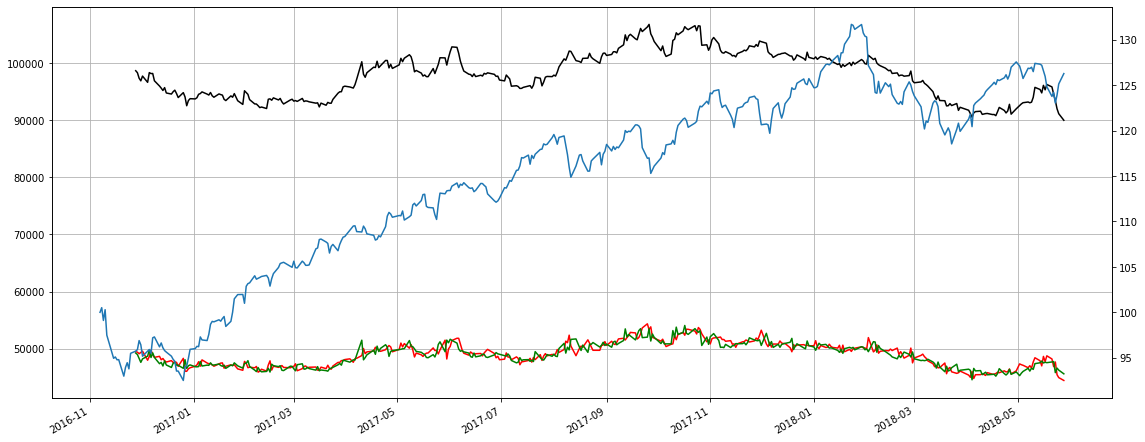

Avg Return Long: 0.4%
Avg Return Short: 0.43%
Avg Return Overall: 0.83%
CAGR: -6.76


In [63]:


months = mdates.MonthLocator()  # every month
monthssFmt = mdates.DateFormatter('%m/%y')

fig, ax = plt.subplots(figsize=(19,8))
ax.plot(pd.to_datetime(PnL_Short[:-500].index,format="%d/%m/%y"),PnL_Short[:-500],'r')
ax.plot(pd.to_datetime(PnL_Short[:-500].index,format="%d/%m/%y"),PnL_Long[:-500],'g')
ax.plot(pd.to_datetime(PnL_Short[:-500].index,format="%d/%m/%y"),Capital[:-500],'k')


ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthssFmt)


datemin = pd.to_datetime(PnL_Short[:-500].index,format="%d/%m/%y").min().date()
datemax = pd.to_datetime(PnL_Short[:-500].index,format="%d/%m/%y").max().date()
ax.grid(True)
secax = ax.twinx()
secax.plot(indexx[:-500])

fig.autofmt_xdate()

pyplot.show()


print("Avg Return Long: " + str(round(((PnL_Long - PnL_Long.shift(1))/PnL_Long).mean()*100,2)) + "%")
print("Avg Return Short: " + str(round(((PnL_Short - PnL_Short.shift(1))/PnL_Short).mean()*100,2)) + "%")
print("Avg Return Overall: " + str(round(((((PnL_Long - PnL_Long.shift(1))/PnL_Long) + ((PnL_Short - PnL_Short.shift(1))/PnL_Short)).mean()*100),2)) + "%")
delta = datetime.datetime.strptime(Capital.index[-500], "%d/%m/%y") - datetime.datetime.strptime(Capital.index[0], "%d/%m/%y")
CAGR = ((Capital[-500]/Capital[0])**(365/delta.days)) - 1
print("CAGR: " +  str(round(CAGR*100,2)))

In [216]:
print(nextfiltered_low[top_buy])
print(nextfiltered_open[top_buy]*(1-stoploss))
print(nextfiltered_close[top_buy])
execution = nextfiltered_close[top_buy]
for symbolll in top_buy:
    
    if((nextfiltered_open[symbolll].values[0]*(1-stoploss)) > nextfiltered_low[symbolll].values[0]):
        execution[symbolll] = nextfiltered_open[symbolll].values[0]*(1-stoploss)
    else:
        execution[symbolll] = nextfiltered_close[symbolll].values[0]
    
print(execution)

          HDBK.NS  NMDC.NS  NHPC.NS  PROC.NS   SHCM.NS
Date                                                  
10/06/20    978.2     88.7    19.95   9900.0  21149.85
          HDBK.NS  NMDC.NS  NHPC.NS  PROC.NS    SHCM.NS
Date                                                   
10/06/20    970.2   90.258     19.6   9702.0  20747.629
          HDBK.NS  NMDC.NS  NHPC.NS  PROC.NS  SHCM.NS
Date                                                 
10/06/20   991.85     89.9     20.0   9953.2  21513.3
          HDBK.NS  NMDC.NS  NHPC.NS  PROC.NS  SHCM.NS
Date                                                 
10/06/20   991.85   90.258     20.0   9953.2  21513.3


ValueError: autodetected range of [nan, nan] is not finite

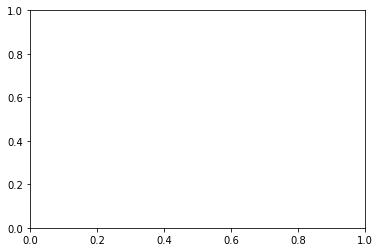

In [160]:
buy_series = pd.Series(index=df[nDays:].index)
sell_series = pd.Series(index=df[nDays:].index)
for i in range(len(returns_buy_list)):
               
    buy_series[i] = returns_buy_list[i].mean(axis=1).values[0]
    sell_series[i] = returns_sell_list[i].mean(axis=1).values[0]
    
    
pyplot.hist(buy_series,bins=75)
pyplot.hist(sell_series,bins=75)
print(buy_series.skew())
print(sell_series.skew())

In [31]:
((df_open - df_low[6:])*100/df_open).mean(axis=0).mean()

1.035130513537752